In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_age = pd.read_csv('age.csv',sep = ';')
data_admission = pd.read_csv('admission.csv',sep = ';')
data_signal = pd.read_csv('signal.csv',sep = ';')

In [3]:
data_age.sort_values(by=['pat_id']).head()

Unnamed: 0  pat_id   age
0           0       0  35.0
1           1       1  77.0
2           2       2  77.0
3           3       3  61.0
4           4       4  27.0

In [4]:
data_admission

Unnamed: 0  pat_id date_admission date_discharge
0          19292    1081     2014-05-14     2014-05-16
1          19293    1304     2014-06-13     2014-06-14
2          19295    1101     2014-05-14     2014-05-17
3          19298     895     2014-06-24     2014-06-25
4          19299    1468     2014-07-24     2014-07-25
...          ...     ...            ...            ...
1564       24154     927     2016-09-10     2016-09-11
1565       24156     514     2016-08-11     2016-08-12
1566       24161     775     2016-08-21     2016-08-27
1567       24164     383     2016-08-02     2016-08-03
1568       24165     845     2016-08-22     2016-08-24

[1569 rows x 4 columns]

In [5]:
data_admission.sort_values(by=['date_admission'])

Unnamed: 0  pat_id date_admission date_discharge
12         19322    1250     2014-05-08     2014-05-12
16         19329     270     2014-05-09     2014-05-10
25         19355     640     2014-05-11     2014-05-12
0          19292    1081     2014-05-14     2014-05-16
2          19295    1101     2014-05-14     2014-05-17
...          ...     ...            ...            ...
1550       24105     138     2016-09-12     2016-09-14
1551       24106       8     2016-09-12     2016-09-13
1548       24097    1219     2016-09-19     2016-09-24
1556       24124     329     2016-09-24     2016-09-25
1558       24133    1219     2016-09-26     2016-09-29

[1569 rows x 4 columns]

In [6]:
data_admission[data_admission.duplicated(keep=False)]

Empty DataFrame
Columns: [Unnamed: 0, pat_id, date_admission, date_discharge]
Index: []

In [7]:
data_signal.head()

Unnamed: 0  Unnamed: 0.1  pat_id         day  hour       parameter  \
0           0             0       0  2016-01-05    23  blood_pressure   
1           1             1       0  2016-01-06     0  blood_pressure   
2           2             2       0  2016-01-06     1  blood_pressure   
3           3             3       0  2016-01-06     2  blood_pressure   
4           4             4       0  2016-01-06     3  blood_pressure   

        value  
0  104.543181  
1  110.542544  
2  133.832002  
3  133.067666  
4  134.566003

In [8]:
data_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1495 non-null   int64  
 1   pat_id      1495 non-null   int64  
 2   age         1495 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 35.2 KB


In [9]:
data_age.describe()

Unnamed: 0       pat_id          age
count  1495.00000  1495.000000  1495.000000
mean    747.00000   792.460870    59.321070
std     431.71364   454.941954    16.012668
min       0.00000     0.000000    12.000000
25%     373.50000   398.500000    51.000000
50%     747.00000   795.000000    63.000000
75%    1120.50000  1189.500000    71.000000
max    1494.00000  1568.000000    91.000000

In [10]:
data_admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1569 non-null   int64 
 1   pat_id          1569 non-null   int64 
 2   date_admission  1569 non-null   object
 3   date_discharge  1569 non-null   object
dtypes: int64(2), object(2)
memory usage: 49.2+ KB


In [11]:
from datetime import datetime, date, timedelta
data_admission['duration']= [int(i.days) for i in 
                             (pd.to_datetime(data_admission['date_discharge'])- pd.to_datetime(data_admission['date_admission']))]

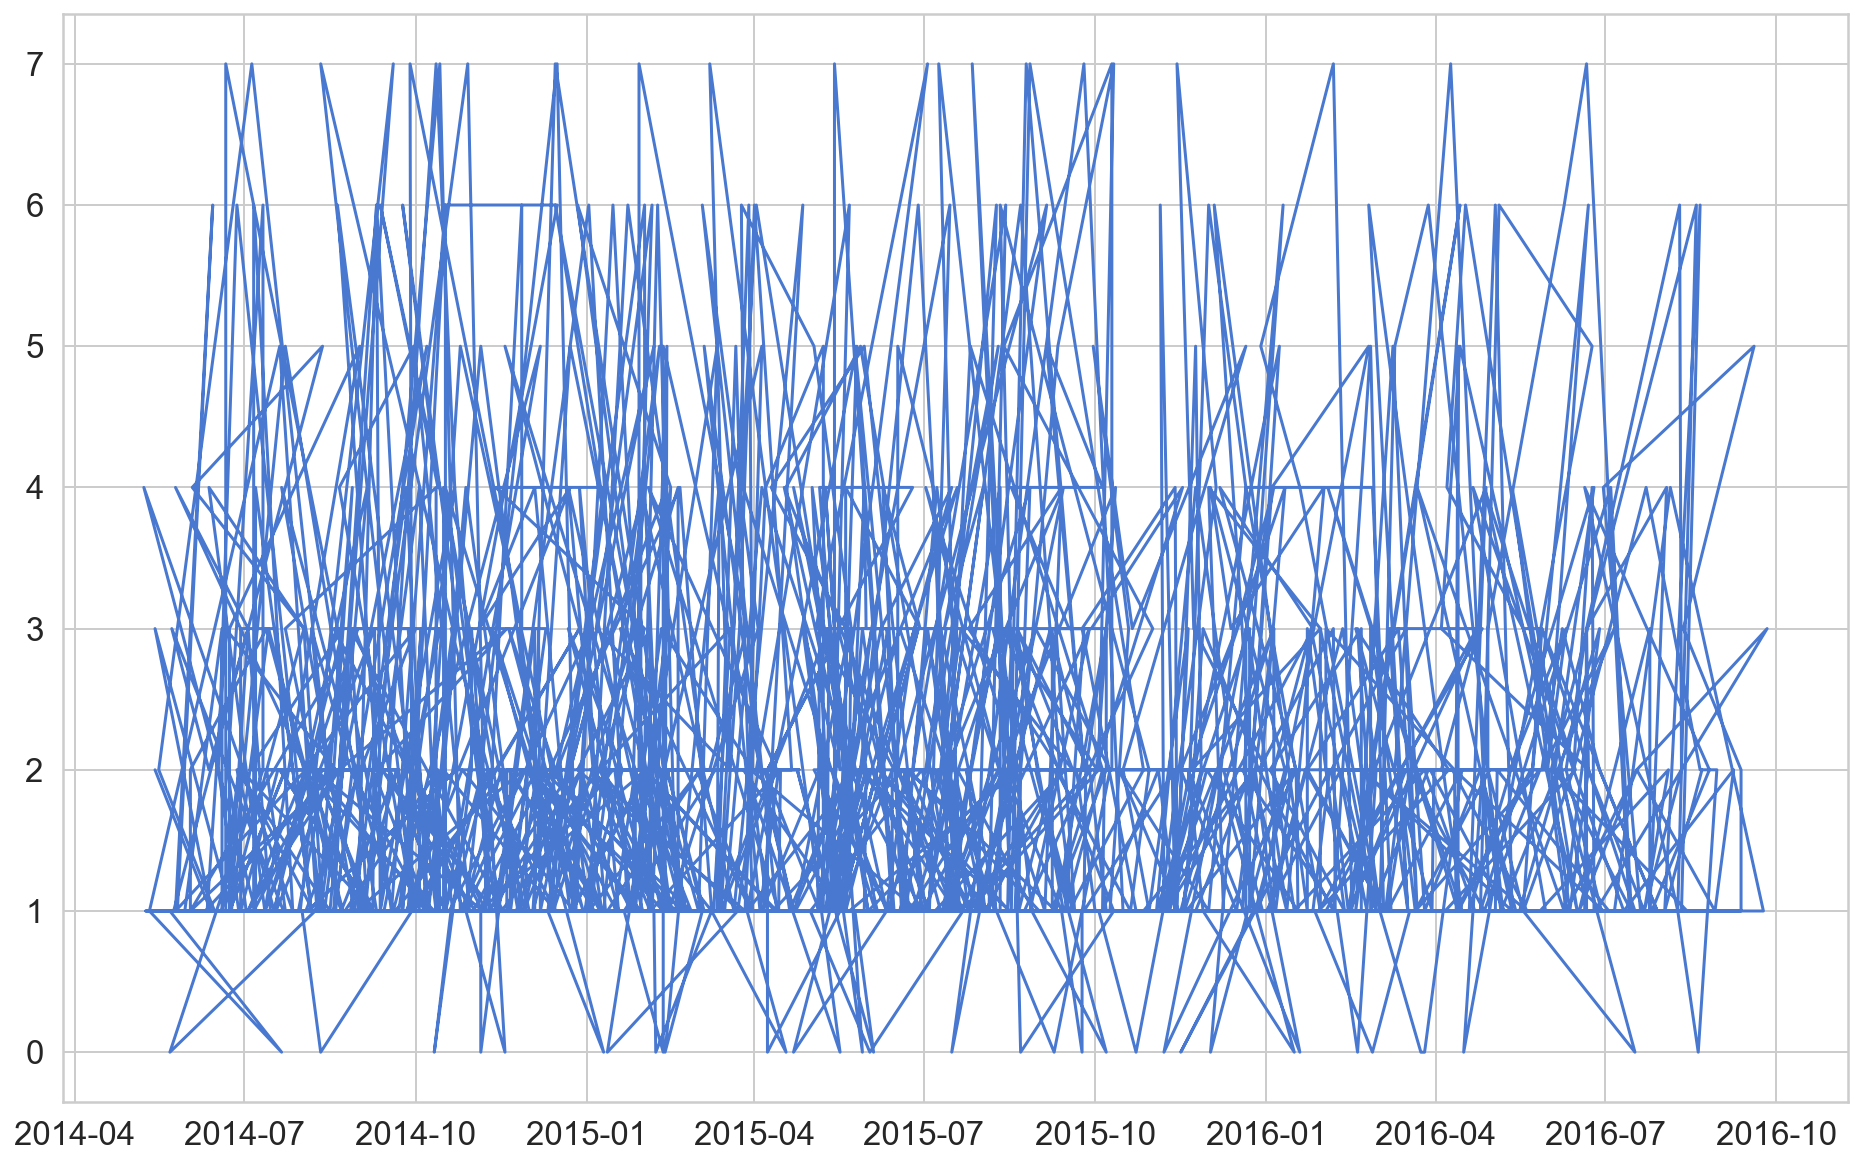

In [13]:
data_admission.sort_values(by=['pat_id']).head()

Unnamed: 0  pat_id date_admission date_discharge  duration
1344       23276       0     2016-01-05     2016-01-07         2
180        19705       1     2014-07-04     2014-07-06         2
448        20331       3     2014-10-16     2014-10-20         4
730        21021       4     2015-02-06     2015-02-07         1
532        20529       5     2014-12-06     2014-12-08         2

In [14]:
data_admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1569 non-null   int64 
 1   pat_id          1569 non-null   int64 
 2   date_admission  1569 non-null   object
 3   date_discharge  1569 non-null   object
 4   duration        1569 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 61.4+ KB


In [15]:
data_signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99914 entries, 0 to 99913
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    99914 non-null  int64  
 1   Unnamed: 0.1  99914 non-null  int64  
 2   pat_id        99914 non-null  int64  
 3   day           99914 non-null  object 
 4   hour          99914 non-null  int64  
 5   parameter     99914 non-null  object 
 6   value         99914 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


In [16]:
data_all = [data_age,data_admission,data_signal]

In [17]:
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['pat_id'],
                                            how='left'), data_all)

In [18]:
df_merged.head()

Unnamed: 0_x  pat_id   age  Unnamed: 0_y date_admission date_discharge  \
0             0       0  35.0       23276.0     2016-01-05     2016-01-07   
1             0       0  35.0       23276.0     2016-01-05     2016-01-07   
2             0       0  35.0       23276.0     2016-01-05     2016-01-07   
3             0       0  35.0       23276.0     2016-01-05     2016-01-07   
4             0       0  35.0       23276.0     2016-01-05     2016-01-07   

   duration  Unnamed: 0  Unnamed: 0.1         day  hour       parameter  \
0       2.0         0.0           0.0  2016-01-05  23.0  blood_pressure   
1       2.0         1.0           1.0  2016-01-06   0.0  blood_pressure   
2       2.0         2.0           2.0  2016-01-06   1.0  blood_pressure   
3       2.0         3.0           3.0  2016-01-06   2.0  blood_pressure   
4       2.0         4.0           4.0  2016-01-06   3.0  blood_pressure   

        value  
0  104.543181  
1  110.542544  
2  133.832002  
3  133.067666  
4  134.566003

In [19]:
data_par =df_merged.pivot_table('value', ['pat_id', 'age','date_admission','date_discharge','duration','day','hour'],'parameter')

In [20]:
data_par

parameter                                                           blood_pressure  \
pat_id age  date_admission date_discharge duration day        hour                   
0      35.0 2016-01-05     2016-01-07     2.0      2016-01-05 23.0      104.543181   
                                                   2016-01-06 0.0       110.542544   
                                                              1.0       133.832002   
                                                              2.0       133.067666   
                                                              3.0       134.566003   
...                                                                            ...   
1568   64.0 2016-01-18     2016-01-19     1.0      2016-01-19 9.0       166.386488   
                                                              10.0      143.166335   
                                                              11.0      145.432503   
                                                              12.0      144.899670   
                                                              13.0      157.562183   

parameter                                                           respiration_rate  \
pat_id age  date_admission date_discharge duration day        hour                     
0      35.0 2016-01-05     2016-01-07     2.0      2016-01-05 23.0               NaN   
                                                   2016-01-06 0.0                NaN   
                                                              1.0                NaN   
                                                              2.0                NaN   
                                                              3.0                NaN   
...                                                                              ...   
1568   64.0 2016-01-18     2016-01-19     1.0      2016-01-19 9.0                4.0   
                                                              10.0               NaN   
                                                              11.0               NaN   
                                                              12.0               4.0   
                                                              13.0               NaN   

parameter                                                           temperature  
pat_id age  date_admission date_discharge duration day        hour               
0      35.0 2016-01-05     2016-01-07     2.0      2016-01-05 23.0          NaN  
                                                   2016-01-06 0.0           NaN  
                                                              1.0           NaN  
                                                              2.0           NaN  
                                                              3.0           NaN  
...                                                                         ...  
1568   64.0 2016-01-18     2016-01-19     1.0      2016-01-19 9.0           NaN  
                                                              10.0          NaN  
                                                              11.0          NaN  
                                                              12.0          NaN  
                                                              13.0          NaN  

[71969 rows x 3 columns]

In [21]:
data_par.reset_index( drop=False, inplace=True )

In [22]:
data_par

parameter  pat_id   age date_admission date_discharge  duration         day  \
0               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-05   
1               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
2               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
3               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
4               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
...           ...   ...            ...            ...       ...         ...   
71964        1568  64.0     2016-01-18     2016-01-19       1.0  2016-01-19   
71965        1568  64.0     2016-01-18     2016-01-19       1.0  2016-01-19   
71966        1568  64.0     2016-01-18     2016-01-19       1.0  2016-01-19   
71967        1568  64.0     2016-01-18     2016-01-19       1.0  2016-01-19   
71968        1568  64.0     2016-01-18     2016-01-19       1.0  2016-01-19   

parameter  hour  blood_pressure  respiration_rate  temperature  
0          23.0      104.543181               NaN          NaN  
1           0.0      110.542544               NaN          NaN  
2           1.0      133.832002               NaN          NaN  
3           2.0      133.067666               NaN          NaN  
4           3.0      134.566003               NaN          NaN  
...         ...             ...               ...          ...  
71964       9.0      166.386488               4.0          NaN  
71965      10.0      143.166335               NaN          NaN  
71966      11.0      145.432503               NaN          NaN  
71967      12.0      144.899670               4.0          NaN  
71968      13.0      157.562183               NaN          NaN  

[71969 rows x 10 columns]

In [23]:
data_all = data_par.reindex(['pat_id', 'age','date_admission','date_discharge','duration','day','hour','blood_pressure','respiration_rate','temperature'],axis=1)

In [24]:
data_all.head()

parameter  pat_id   age date_admission date_discharge  duration         day  \
0               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-05   
1               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
2               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
3               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
4               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   

parameter  hour  blood_pressure  respiration_rate  temperature  
0          23.0      104.543181               NaN          NaN  
1           0.0      110.542544               NaN          NaN  
2           1.0      133.832002               NaN          NaN  
3           2.0      133.067666               NaN          NaN  
4           3.0      134.566003               NaN          NaN

In [25]:
#data_all.sort_values(by=['pat_id']).to_csv('mydata1.csv')
data_s = data_par.sort_values(['date_admission', 'day'], ascending=[True, True])#.to_csv('mydata1.csv')

In [26]:
data_s.head()

parameter  pat_id   age date_admission date_discharge  duration         day  \
53394        1250  43.0     2014-05-08     2014-05-12       4.0  2014-05-08   
53395        1250  43.0     2014-05-08     2014-05-12       4.0  2014-05-08   
53396        1250  43.0     2014-05-08     2014-05-12       4.0  2014-05-08   
53397        1250  43.0     2014-05-08     2014-05-12       4.0  2014-05-08   
53398        1250  43.0     2014-05-08     2014-05-12       4.0  2014-05-08   

parameter  hour  blood_pressure  respiration_rate  temperature  
53394      19.0      105.329998               NaN          NaN  
53395      20.0      120.594739               NaN          NaN  
53396      21.0      104.233168               NaN          NaN  
53397      22.0      100.833336               NaN          NaN  
53398      23.0      100.881866               NaN          NaN

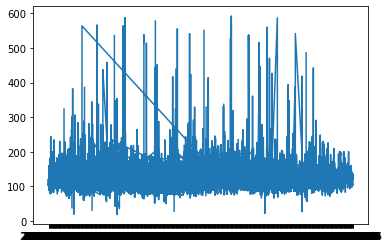

In [25]:
plt.plot(data_s['day'],data_s['blood_pressure'])

In [27]:
data_s.shape

(71969, 10)

In [28]:
data_s.columns

Index(['pat_id', 'age', 'date_admission', 'date_discharge', 'duration', 'day',
       'hour', 'blood_pressure', 'respiration_rate', 'temperature'],
      dtype='object', name='parameter')

In [29]:
data_s['day'].index

Int64Index([53394, 53395, 53396, 53397, 53398, 53399, 53400, 53401, 53402,
            53403,
            ...
            51125, 51126, 51127, 51128, 51129, 51130, 51131, 51132, 51133,
            51134],
           dtype='int64', length=71969)

In [39]:
data_s["day_w"] = data_s['day'].map(lambda x: x.day)
data_s["month"] = data_s['day'].map(lambda x: x.month)
data_s["year"] = data_s['day'].map(lambda x: x.year)

In [45]:
data_s.head(50) 

parameter  pat_id   age date_admission date_discharge  duration        day  \
53394        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-08   
53395        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-08   
53396        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-08   
53397        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-08   
53398        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-08   
53399        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53400        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53401        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53402        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53403        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53404        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53405        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53406        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53407        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53408        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53409        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53410        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53411        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53412        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53413        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53414        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53415        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53416        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53417        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53418        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53419        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53420        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53421        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53422        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-09   
53423        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   
53424        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   
53425        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   
53426        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   
53427        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   
53428        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   
53429        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   
53430        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   
53431        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   
53432        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   
53433        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   
53434        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   
53435        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   
53436        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   
53437        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   
53438        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   
53439        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   
53440        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   
53441        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   
53442        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   
53443        1250  43.0     2014-05-08     2014-05-12       4.0 2014-05-10   

parameter  hour  bloo

In [21]:
data = data_all[data_all['pat_id']== 1]
data['blood_pressure'].mean()

127.87876149857816

<AxesSubplot:xlabel='pat_id', ylabel='respiration_rate'>

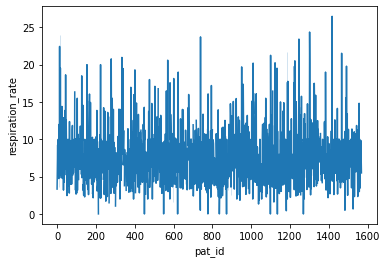

In [49]:
sns.lineplot(x='pat_id',y='respiration_rate', data=data_s)

<AxesSubplot:xlabel='day', ylabel='respiration_rate'>

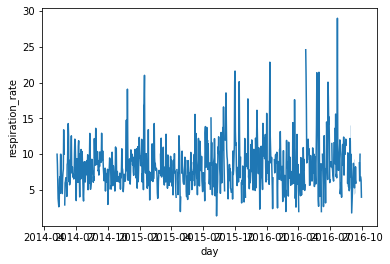

In [51]:
sns.lineplot(x='day',y='respiration_rate', data=data_s)

<AxesSubplot:xlabel='duration', ylabel='respiration_rate'>

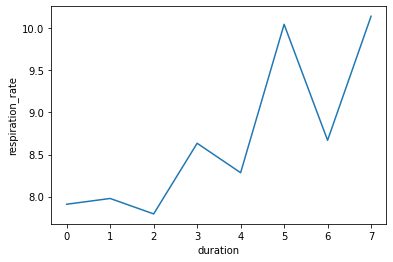

In [58]:
sns.lineplot(x='duration',y='respiration_rate', data=data_s)

<AxesSubplot:xlabel='pat_id', ylabel='blood_pressure'>

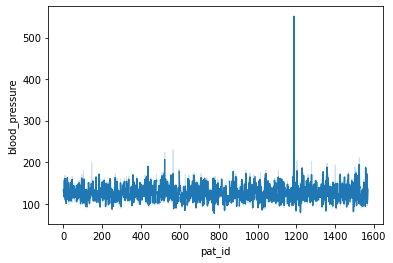

In [50]:
sns.lineplot(x='pat_id',y='blood_pressure', data=data_s)

<AxesSubplot:xlabel='hour', ylabel='blood_pressure'>

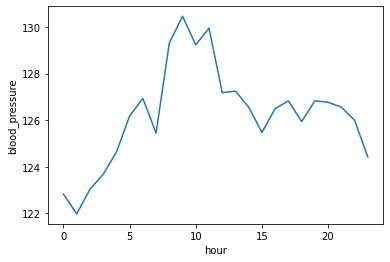

In [47]:
sns.lineplot(x='hour',y='blood_pressure', data=data_s)

<AxesSubplot:xlabel='duration', ylabel='blood_pressure'>

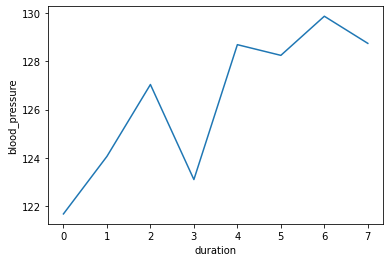

In [48]:
sns.lineplot(x='duration',y='blood_pressure', data=data_s)

In [66]:
df = data_s[['age','duration','hour','blood_pressure','day_w','month','year']]
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

64772 7197


In [67]:
from sklearn.preprocessing import RobustScaler

In [68]:
f_columns = ['age', 'duration', 'hour']
f_transformer = RobustScaler()
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)
test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)

/Users/elham/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/Users/elham/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [69]:
bp_transformer = RobustScaler()
bp_transformer = bp_transformer.fit(train[['blood_pressure']])
train['blood_pressure'] = bp_transformer.transform(train[['blood_pressure']])
test['blood_pressure'] = bp_transformer.transform(test[['blood_pressure']])

<ipython-input-69-46d9d33165d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['blood_pressure'] = bp_transformer.transform(train[['blood_pressure']])
<ipython-input-69-46d9d33165d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['blood_pressure'] = bp_transformer.transform(test[['blood_pressure']])


In [70]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [71]:
time_steps = 10
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.blood_pressure, time_steps)
X_test, y_test = create_dataset(test, test.blood_pressure, time_steps)
print(X_train.shape, y_train.shape)

(64762, 10, 7) (64762,)


In [61]:
X_train

array([[[-0.9523809523809523, 0.6666666666666666,
         Timestamp('2014-05-08 00:00:00'), ..., 8, 5, 2014],
        [-0.9523809523809523, 0.6666666666666666,
         Timestamp('2014-05-08 00:00:00'), ..., 8, 5, 2014],
        [-0.9523809523809523, 0.6666666666666666,
         Timestamp('2014-05-08 00:00:00'), ..., 8, 5, 2014],
        ...,
        [-0.9523809523809523, 0.6666666666666666,
         Timestamp('2014-05-09 00:00:00'), ..., 9, 5, 2014],
        [-0.9523809523809523, 0.6666666666666666,
         Timestamp('2014-05-09 00:00:00'), ..., 9, 5, 2014],
        [-0.9523809523809523, 0.6666666666666666,
         Timestamp('2014-05-09 00:00:00'), ..., 9, 5, 2014]],

       [[-0.9523809523809523, 0.6666666666666666,
         Timestamp('2014-05-08 00:00:00'), ..., 8, 5, 2014],
        [-0.9523809523809523, 0.6666666666666666,
         Timestamp('2014-05-08 00:00:00'), ..., 8, 5, 2014],
        [-0.9523809523809523, 0.6666666666666666,
         Timestamp('2014-05-08 00:00:00'), ...,

In [72]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [73]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [74]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
1822/1822 [==============================] - 49s 27ms/step - loss: nan - val_loss: nan
Epoch 2/30
1822/1822 [==============================] - 48s 26ms/step - loss: nan - val_loss: nan
Epoch 3/30
1822/1822 [==============================] - 52s 29ms/step - loss: nan - val_loss: nan
Epoch 4/30
1822/1822 [==============================] - 54s 29ms/step - loss: nan - val_loss: nan
Epoch 5/30
1822/1822 [==============================] - 53s 29ms/step - loss: nan - val_loss: nan
Epoch 6/30
1220/1822 [===================>..........] - ETA: 15s - loss: nan

KeyboardInterrupt: 

In [51]:
min_id = data_all['pat_id'].min()
max_id = data_all['pat_id'].max()
p_id = []
max_pre_all = []
min_pre_all = []
mean_pre_all= []
max_pre_first = []
min_pre_first = []
mean_pre_first = []
max_pre_last = []
min_pre_last = []
mean_pre_last = []
max_tem_all = []
min_tem_all = []
mean_tem_all = []
max_rate_all = []
min_rate_all = []

for i in range(min_id,max_id):

    p_id.append(i)
    
    data = data_all[data_all['pat_id']== i]
    data_lastday = data[pd.to_datetime(data['day'])== pd.to_datetime(data['date_discharge'])]
    data_firstday = data[pd.to_datetime(data['day'])== pd.to_datetime(data['date_admission'])]

    max_pre_all.append(data['blood_pressure'].max())
    min_pre_all.append(data['blood_pressure'].min())
    mean_pre_all.append(data['blood_pressure'].mean())
    
    max_pre_last.append(data_lastday['blood_pressure'].max())
    min_pre_last.append(data_lastday['blood_pressure'].min())
    mean_pre_last.append(data_lastday['blood_pressure'].mean())
    
    max_pre_first.append(data_firstday['blood_pressure'].max())
    min_pre_first.append(data_firstday['blood_pressure'].min())
    mean_pre_first.append(data_firstday['blood_pressure'].mean())
    
    
    max_tem_all.append(data['temperature'].max())
    min_tem_all.append(data['temperature'].min())
    mean_tem_all.append(data['temperature'].mean())
    
    max_rate_all.append(data['respiration_rate'].max())
    min_rate_all.append(data['respiration_rate'].min())
    
    

In [52]:
data = data_admission[['pat_id','date_admission','date_discharge','duration']]
data_a = data_age[['pat_id','age']]

In [53]:
data_f = pd.DataFrame(list(zip(p_id,max_pre_all,min_pre_all,mean_pre_all,max_pre_first,min_pre_first,
                               mean_pre_first,max_pre_last,min_pre_last,mean_pre_last,max_tem_all,
                               min_tem_all,max_rate_all,min_rate_all))
                            
                               ,columns =['pat_id','max_pressure','min_pressure','mean_pressure',
                                         'max_pressure_fd','min_pressure_fd','mean_pressure_fd',
                                         'max_pressure_ld','min_pressure_ld','mean_pressure_ld',
                                         'max_temperature','min_temperature',
                                         'max_rate','min_rate'])

In [54]:
data_a

pat_id   age
0          0  35.0
1          1  77.0
2          2  77.0
3          3  61.0
4          4  27.0
...      ...   ...
1490    1564  87.0
1491    1565  68.0
1492    1566  73.0
1493    1567  83.0
1494    1568  64.0

[1495 rows x 2 columns]

In [55]:
data_ana = [data,data_a,data_f]

In [56]:
df_merged_ana = reduce(lambda  left,right: pd.merge(left,right,on=['pat_id'],
                                            how='left'), data_ana)

In [57]:
df = df_merged_ana.sort_values(by=['pat_id']).dropna()

In [58]:
df.to_csv('mydata.csv')

<AxesSubplot:>

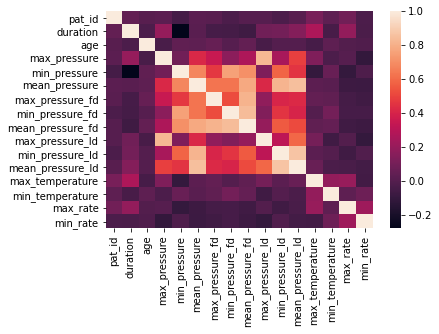

In [59]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, 
         yticklabels=corr.columns)

/Users/elham/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/elham/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


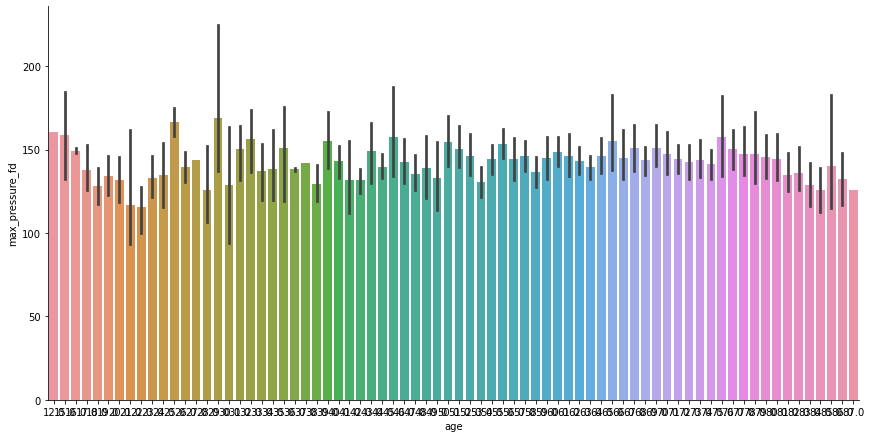

In [60]:
sns.factorplot(x='age',y='max_pressure_fd',data=df,kind='bar',size=6, aspect=2)

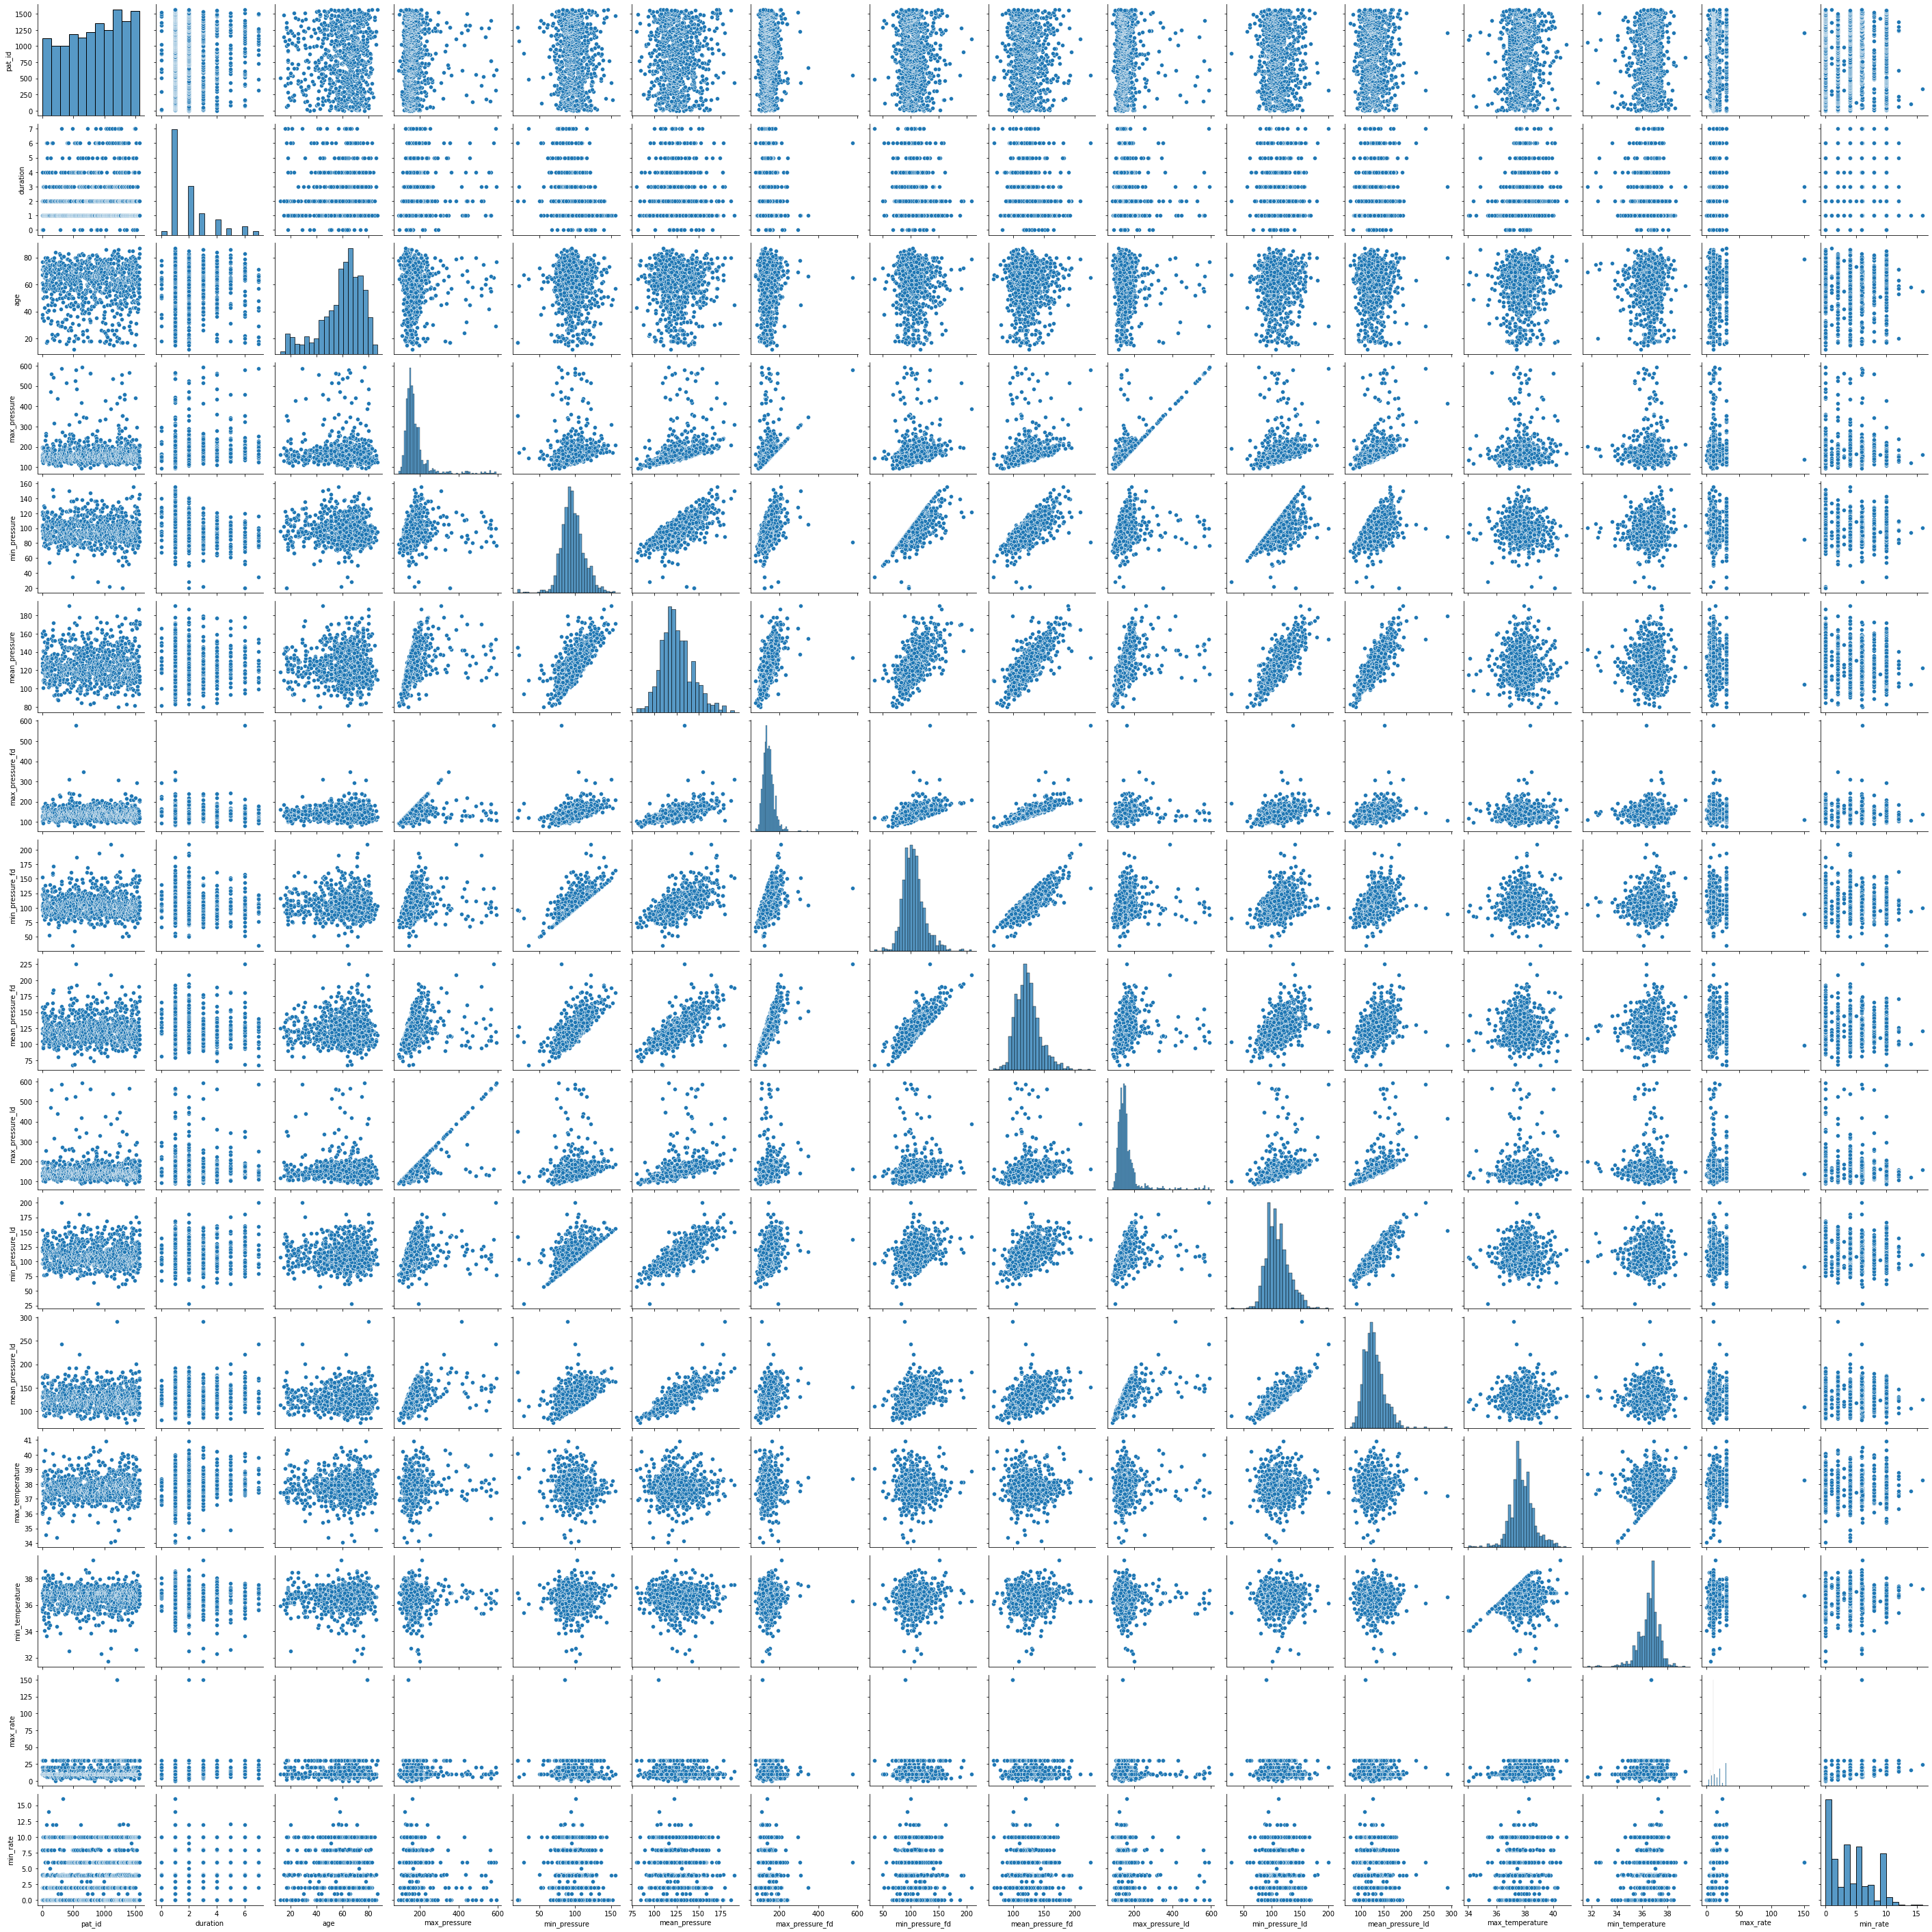

In [92]:
sns.pairplot(df)

In [67]:
data = data_all[['age','blood_pressure','duration']].dropna()
data

parameter   age  blood_pressure  duration
0          35.0      104.543181       2.0
1          35.0      110.542544       2.0
2          35.0      133.832002       2.0
3          35.0      133.067666       2.0
4          35.0      134.566003       2.0
...         ...             ...       ...
71964      64.0      166.386488       1.0
71965      64.0      143.166335       1.0
71966      64.0      145.432503       1.0
71967      64.0      144.899670       1.0
71968      64.0      157.562183       1.0

[68724 rows x 3 columns]

In [74]:
features = ['age','max_pressure','min_pressure','mean_pressure',
                                         'max_pressure_fd','min_pressure_fd','mean_pressure_fd',
                                         'max_pressure_ld','min_pressure_ld','mean_pressure_ld',
                                         'max_temperature','min_temperature',
                                         'max_rate','min_rate']
X = df[features]
#X = data[['age','blood_pressure']]
y = df['duration'].values 

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [76]:
X_test

age  max_pressure  min_pressure  mean_pressure  max_pressure_fd  \
526   83.0    192.903140     93.766667     124.870960       137.799667   
988   68.0    265.999504     92.132836     131.573835       143.388818   
41    59.0    191.511064    108.644240     135.444282       129.620869   
1307  25.0    157.864088    115.534002     133.464519       157.864088   
763   42.0    136.600671    103.467670     119.693923       136.600671   
...    ...           ...           ...            ...              ...   
645   65.0    242.497540    109.090911     165.654222       242.497540   
1364  63.0    167.188116     85.599670     127.257457       167.188116   
719   79.0    124.000005     95.600666     105.908505       119.534836   
753   31.0    235.567399    103.920002     174.055676       154.099176   
652   66.0    217.549999     82.534669     127.312304       167.933345   

      min_pressure_fd  mean_pressure_fd  max_pressure_ld  min_pressure_ld  \
526        101.585003        122.165875       150.033338       114.932504   
988        103.100669        124.258131       165.809994       127.834835   
41         111.634169        123.240061       160.320199       108.644240   
1307       126.800502        141.043697       148.800672       115.534002   
763        103.467670        119.324652       136.466668       105.200002   
...               ...               ...              ...              ...   
645        109.090911        181.666721       171.533007       147.441604   
1364        99.268501        128.706904       150.034839        85.599670   
719         97.333166        107.888656       124.000005        95.600666   
753        103.920002        128.624076       235.567399       176.000502   
652         92.832668        114.698679       217.549999        82.534669   

      mean_pressure_ld  max_temperature  min_temperature  max_rate  min_rate  
526         128.632670        38.051281        36.210252     30.00     -0.01  
988         147.170691        38.153846        36.917950     19.99      2.00  
41          129.659814        37.948717        36.097436     10.01      1.01  
1307        131.840409        37.128207        36.820515     10.00      5.99  
763         123.308791        37.533332        34.466668     10.01      4.01  
...                ...              ...              ...       ...       ...  
645         157.988536        39.697436        37.333332     16.01      3.99  
1364        124.099649        37.543588        36.107693     20.00      3.99  
719         104.860189        38.051281        38.051281     10.01      4.00  
753         200.416226        38.969231        35.584615     12.01      3.99  
652         131.146093        38.569227        36.415386     10.01      5.99  

[184 rows x 14 columns]

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [88]:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [92]:
SVC_model = SVC()
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [93]:
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)


KNeighborsClassifier()

In [95]:
KNN_model.predict(X_test)

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0])

In [96]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

clf.predict(X_test)

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0])

In [78]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.42934782608695654


In [80]:
y_pred_train = clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy: 0.9645293315143247


ValueError: query data dimension must match training data dimension

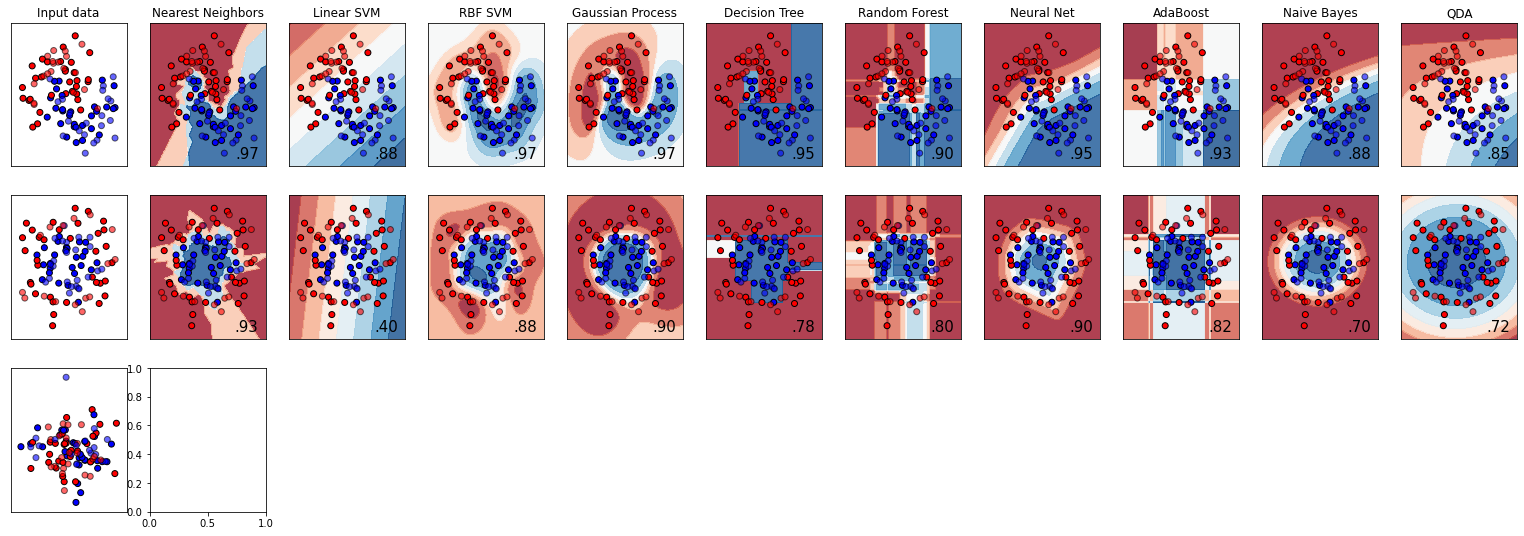

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=8, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [48]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [49]:
y_pred = rf_model.predict(X_test)

Test set R^2:  -0.28523296901964
Test MAE score: 1.1359
Test MSE: 3.233695652173913
Test RMSE: 1.7982479395717135


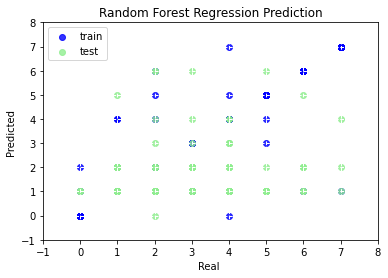

In [79]:
print("Test set R^2: ", r2_score(y_test, y_pred))
print("Test MAE score: %.4f" % mean_absolute_error(y_test, y_pred))
print('Test MSE:', mean_squared_error(y_test, y_pred))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

y_pred_train = clf.predict(X_train)
plt.xlim((-1,8))
plt.ylim((-1,8))
plt.title("Random Forest Regression Prediction")
plt.xlabel("Real ")
plt.ylabel("Predicted ")
plt.grid(color='w', linestyle='--', linewidth=1)
plt.scatter(y_train, y_pred_train, 
            color="blue", alpha=0.8, label="train")
plt.scatter(y_test, y_pred, 
            color="lightgreen", alpha=0.8, label="test")
plt.legend(loc = 'best')
plt.show()

Train set R^2:  0.34346347439102765
Train MAE score: 0.8598
Train MSE: 1.4867135935742672
Train RMSE: 1.21930865394053
Test set R^2:  0.3186522683868307
Test MAE score: 0.9349
Test MSE: 1.7142971355743326
Test RMSE: 1.3093117029853252


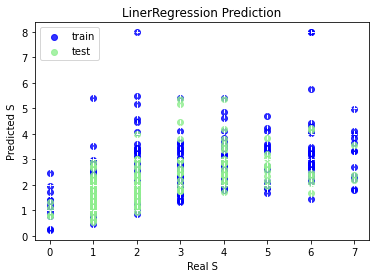

In [119]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
print("Train set R^2: ", r2_score(y_train, y_pred_train))
print("Train MAE score: %.4f" % mean_absolute_error(y_train, y_pred_train))
print('Train MSE:', mean_squared_error(y_train, y_pred_train))
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = model.predict(X_test)
print("Test set R^2: ", r2_score(y_test, y_pred_test))
print("Test MAE score: %.4f" % mean_absolute_error(y_test, y_pred_test))
print('Test MSE:', mean_squared_error(y_test, y_pred_test))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

#plt.xlim((-12,2))
#plt.ylim((-12,2))
plt.title("LinerRegression Prediction")
plt.xlabel("Real S")
plt.ylabel("Predicted S")
plt.grid(color='w', linestyle='--', linewidth=1)
plt.scatter(y_train, model.predict(X_train), 
            color="blue", alpha=0.8, label="train")
plt.scatter(y_test, model.predict(X_test), 
            color="lightgreen", alpha=0.8, label="test")
plt.legend(loc = 'best')
plt.show()

Train set R^2:  0.262398920072893
Train MAE score: 0.8100
Train MSE: 1.6702826261578265
Train RMSE: 1.2923941450493446
Test set R^2:  0.16413506019027413
Test MAE score: 0.9574
Test MSE: 2.103068382792175
Test RMSE: 1.4501959808219629


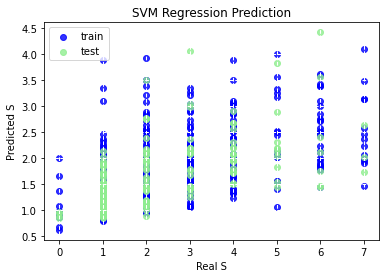

In [120]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
print("Train set R^2: ", r2_score(y_train, y_pred_train))
print("Train MAE score: %.4f" % mean_absolute_error(y_train, y_pred_train))
print('Train MSE:', mean_squared_error(y_train, y_pred_train))
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = model.predict(X_test)
print("Test set R^2: ", r2_score(y_test, y_pred_test))
print("Test MAE score: %.4f" % mean_absolute_error(y_test, y_pred_test))
print('Test MSE:', mean_squared_error(y_test, y_pred_test))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

#plt.xlim((-12,2))
#plt.ylim((-12,2))
plt.title("SVM Regression Prediction")
plt.xlabel("Real S")
plt.ylabel("Predicted S")
plt.grid(color='w', linestyle='--', linewidth=1)
plt.scatter(y_train, model.predict(X_train), 
            color="blue", alpha=0.8, label="train")
plt.scatter(y_test, model.predict(X_test), 
            color="lightgreen", alpha=0.8, label="test")
plt.legend(loc = 'best')
plt.show()

Train set R^2:  0.685666937896571
Train MAE score: 0.5368
Train MSE: 0.7118008185538881
Train RMSE: 0.8436828898074726
Test set R^2:  -0.18533040630172692
Test MAE score: 1.1821
Test MSE: 2.9823369565217392
Test RMSE: 1.726944398792775


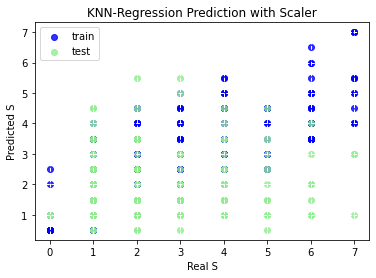

In [121]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
stds = StandardScaler()
stds.fit(X_train)

model = KNeighborsRegressor(n_neighbors=2)
model.fit(stds.transform(X_train), y_train)

y_pred_train = model.predict(stds.transform(X_train))
print("Train set R^2: ", r2_score(y_train, y_pred_train))
print("Train MAE score: %.4f" % mean_absolute_error(y_train, y_pred_train))
print('Train MSE:', mean_squared_error(y_train, y_pred_train))
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = model.predict(stds.transform(X_test))
print("Test set R^2: ", r2_score(y_test, y_pred_test))
print("Test MAE score: %.4f" % mean_absolute_error(y_test, y_pred_test))
print('Test MSE:', mean_squared_error(y_test, y_pred_test))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

#plt.xlim((-12,2))
#plt.ylim((-12,2))
plt.title("KNN-Regression Prediction with Scaler")
plt.xlabel("Real S")
plt.ylabel("Predicted S")
plt.grid(color='w', linestyle='--', linewidth=1)
plt.scatter(y_train, y_pred_train, 
            color="blue", alpha=0.8, label="train")
plt.scatter(y_test, y_pred_test, 
            color="lightgreen", alpha=0.8, label="test")
plt.legend(loc = 'best')
plt.show()

Train set R^2:  0.574793557570853
Train MAE score: 0.5398
Train MSE: 0.9628713306520224
Train RMSE: 0.9812600728920047
Test set R^2:  0.31112785048612523
Test MAE score: 0.8837
Test MSE: 1.7332288608234994
Test RMSE: 1.3165215003270927


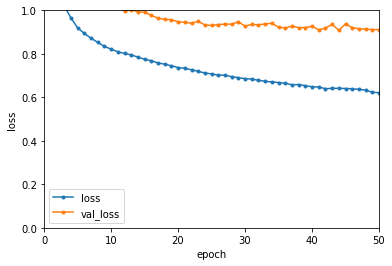

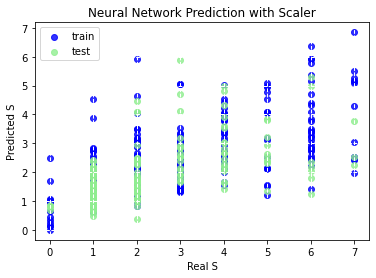

In [122]:

from keras.models import Sequential
from keras.layers import Dense

stds = StandardScaler()
stds.fit(X_train)

model = Sequential()
model.add(Dense(units = 128, input_dim = X.shape[1], activation='relu'))
model.add(Dense(units = 1))
 
# model.summary()

model.compile(loss = 'mae',
    optimizer = 'adam',
    metrics=['accuracy'])
history = model.fit(stds.transform(X_train), y_train, epochs = 100, batch_size = 32,
    validation_data = (stds.transform(X_test), y_test), verbose=0)


y_pred_train = model.predict(stds.transform(X_train))
print("Train set R^2: ", r2_score(y_train, y_pred_train))
print("Train MAE score: %.4f" % mean_absolute_error(y_train, y_pred_train))
print('Train MSE:', mean_squared_error(y_train, y_pred_train))
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = model.predict(stds.transform(X_test))
print("Test set R^2: ", r2_score(y_test, y_pred_test))
print("Test MAE score: %.4f" % mean_absolute_error(y_test, y_pred_test))
print('Test MSE:', mean_squared_error(y_test, y_pred_test))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(loss)
plt.xlim((0, 50))
plt.ylim((0, 1))
plt.plot(range(epochs), loss, marker = '.', label = 'loss')
plt.plot(range(epochs), val_loss, marker = '.', label = 'val_loss')
plt.legend(loc = 'best')
plt.grid(color='w', linestyle='--', linewidth=1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()



#plt.xlim((-12,2))
#plt.ylim((-12,2))
plt.title("Neural Network Prediction with Scaler")
plt.xlabel("Real S")
plt.ylabel("Predicted S")
plt.grid(color='w', linestyle='--', linewidth=1)
plt.scatter(y_train, y_pred_train, 
            color="blue", alpha=0.8, label="train")
plt.scatter(y_test, y_pred_test, 
            color="lightgreen", alpha=0.8, label="test")
plt.legend(loc = 'best')
plt.show()

In [104]:
data.describe()

parameter        pat_id           age      duration          hour  \
count      71969.000000  71969.000000  71969.000000  71969.000000   
mean         872.312635     59.017702      2.970279     11.229071   
std          441.455351     16.631253      1.912337      6.999505   
min            0.000000     12.000000      0.000000      0.000000   
25%          513.000000     50.000000      1.000000      5.000000   
50%          908.000000     63.000000      2.000000     11.000000   
75%         1259.000000     71.000000      4.000000     17.000000   
max         1568.000000     91.000000      7.000000     23.000000   

parameter  blood_pressure  respiration_rate  temperature  
count        68724.000000      32749.000000  7579.000000  
mean           126.221852          8.326627    37.386484  
std             27.264761          5.409157     0.938477  
min             20.000005         -0.010000    31.692309  
25%            108.270469          4.010000    36.923079  
50%            122.299169          7.990000    37.430768  
75%            139.666004         10.010000    37.948717  
max            592.000007        149.990000    40.923077

In [109]:
data[data['duration']==2.0].head(50)

parameter  pat_id   age date_admission date_discharge  duration         day  \
0               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-05   
1               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
2               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
3               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
4               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
5               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
6               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
7               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
8               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
9               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
10              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
11              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
12              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
13              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
14              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
15              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
16              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
17              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
18              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
19              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
20              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
21              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
22              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
23              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
24              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
25              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-07   
26              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-07   
27              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-07   
28              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-07   
29              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-07   
30              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-07   
31              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-07   
32              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-07   
33              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-07   
34              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-07   
35              0  35.0     2016-01-05     2016-01-07       2.0  2016-01-07   
36              1  77.0     2014-07-04     2014-07-06       2.0  2014-07-04   
37              1  77.0     2014-07-04     2014-07-06       2.0  2014-07-04   
38              1  77.0     2014-07-04     2014-07-06       2.0  2014-07-04   
39              1  77.0     2014-07-04     2014-07-06       2.0  2014-07-04   
40              1  77.0     2014-07-04     2014-07-06       2.0  2014-07-04   
41              1  77.0     2014-07-04     2014-07-06       2.0  2014-07-04   
42              1  77.0     2014-07-04     2014-07-06       2.0  2014-07-04   
43              1  77.0     2014-07-04     2014-07-06       2.0  2014-07-04   
44              1  77.0     2014-07-04     2014-07-06       2.0  2014-07-04   
45              1  77.0     2014-07-04     2014-07-06       2.0  2014-07-04   
46              1  77.0     2014-07-04     2014-07-06       2.0  2014-07-04   
47              1  77.0     2014-07-04     2014-07-06       2.0  2014-07-05   
48              1  77.0     2014-07-04     2014-07-06       2.0  2014-07-05   
49              1  77.0     2014-07-04     2014-07

In [110]:
data[data['duration']==6.0]

parameter  pat_id   age date_admission date_discharge  duration         day  \
2218           74  76.0     2014-10-17     2014-10-23       6.0  2014-10-17   
2219           74  76.0     2014-10-17     2014-10-23       6.0  2014-10-17   
2220           74  76.0     2014-10-17     2014-10-23       6.0  2014-10-17   
2221           74  76.0     2014-10-17     2014-10-23       6.0  2014-10-17   
2222           74  76.0     2014-10-17     2014-10-23       6.0  2014-10-17   
...           ...   ...            ...            ...       ...         ...   
71806        1561  64.0     2014-09-12     2014-09-18       6.0  2014-09-23   
71807        1561  64.0     2014-09-12     2014-09-18       6.0  2014-09-23   
71808        1561  64.0     2014-09-12     2014-09-18       6.0  2014-09-23   
71809        1561  64.0     2014-09-12     2014-09-18       6.0  2014-09-23   
71810        1561  64.0     2014-09-12     2014-09-18       6.0  2014-09-23   

parameter  hour  blood_pressure  respiration_rate  temperature  
2218       18.0      109.200006               NaN          NaN  
2219       20.0      124.422635               NaN    33.641022  
2220       21.0      163.599829               NaN          NaN  
2221       22.0      161.666664               NaN          NaN  
2222       23.0      161.001491               NaN          NaN  
...         ...             ...               ...          ...  
71806       9.0      108.712543              6.00          NaN  
71807      10.0      109.401001              6.01          NaN  
71808      11.0      111.398669              6.01    36.917950  
71809      12.0      112.066502              6.00          NaN  
71810      13.0      114.910911              5.99          NaN  

[7058 rows x 10 columns]

In [145]:
last_1day = pd.to_datetime(data['date_discharge'])-pd.Timedelta(days=1)
data1 = data[(pd.to_datetime(data['day'])== pd.to_datetime(data['date_discharge'])) | (pd.to_datetime(data['day'])== pd.to_datetime(data['date_discharge'])-pd.Timedelta(days=1))]

In [148]:
data1

parameter  pat_id   age date_admission date_discharge  duration         day  \
1               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
2               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
3               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
4               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
5               0  35.0     2016-01-05     2016-01-07       2.0  2016-01-06   
...           ...   ...            ...            ...       ...         ...   
71964        1568  64.0     2016-01-18     2016-01-19       1.0  2016-01-19   
71965        1568  64.0     2016-01-18     2016-01-19       1.0  2016-01-19   
71966        1568  64.0     2016-01-18     2016-01-19       1.0  2016-01-19   
71967        1568  64.0     2016-01-18     2016-01-19       1.0  2016-01-19   
71968        1568  64.0     2016-01-18     2016-01-19       1.0  2016-01-19   

parameter  hour  blood_pressure  respiration_rate  temperature  
1           0.0      110.542544               NaN          NaN  
2           1.0      133.832002               NaN          NaN  
3           2.0      133.067666               NaN          NaN  
4           3.0      134.566003               NaN          NaN  
5           4.0      137.232667               NaN          NaN  
...         ...             ...               ...          ...  
71964       9.0      166.386488               4.0          NaN  
71965      10.0      143.166335               NaN          NaN  
71966      11.0      145.432503               NaN          NaN  
71967      12.0      144.899670               4.0          NaN  
71968      13.0      157.562183               NaN          NaN  

[39934 rows x 10 columns]

In [139]:
data2 = data[pd.to_datetime(data['day'])== pd.to_datetime(data['date_discharge'])-pd.Timedelta(days=1)]

In [150]:
lstm_data = data1[['age','hour','day','blood_pressure']]

In [151]:
lstm_data

parameter   age  hour         day  blood_pressure
1          35.0   0.0  2016-01-06      110.542544
2          35.0   1.0  2016-01-06      133.832002
3          35.0   2.0  2016-01-06      133.067666
4          35.0   3.0  2016-01-06      134.566003
5          35.0   4.0  2016-01-06      137.232667
...         ...   ...         ...             ...
71964      64.0   9.0  2016-01-19      166.386488
71965      64.0  10.0  2016-01-19      143.166335
71966      64.0  11.0  2016-01-19      145.432503
71967      64.0  12.0  2016-01-19      144.899670
71968      64.0  13.0  2016-01-19      157.562183

[39934 rows x 4 columns]

(array([1843., 1280., 1330., 1997., 1418., 1826., 3301., 2542., 2692.,
        4103.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

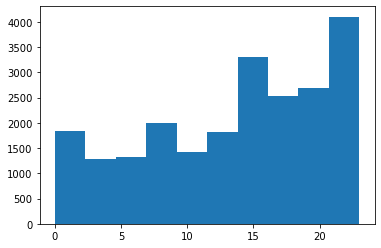

In [171]:
plt.hist(data2['hour'])

In [153]:
lstm_data[lstm_data['age']== 59.0]

parameter   age  hour         day  blood_pressure
1679       59.0  17.0  2016-05-06      118.443336
1680       59.0  18.0  2016-05-06      114.633002
1681       59.0  19.0  2016-05-06      107.600168
1682       59.0  20.0  2016-05-06      130.299672
1683       59.0  21.0  2016-05-06      119.667670
...         ...   ...         ...             ...
65228      59.0   6.0  2014-08-13      102.334169
65229      59.0   7.0  2014-08-13      105.969335
65230      59.0   8.0  2014-08-13      100.101336
65231      59.0   9.0  2014-08-13      108.532168
65232      59.0  10.0  2014-08-13       98.450754

[958 rows x 4 columns]